In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 163s 14us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

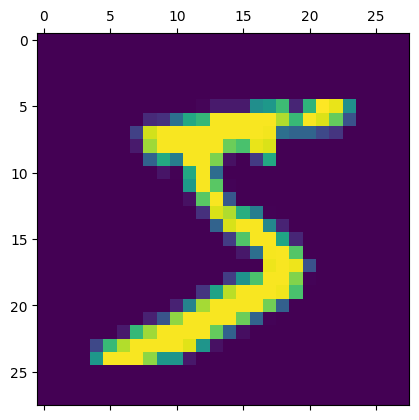

In [5]:
plt.matshow(x_train[0])

In [6]:
y_train[0]

5

In [15]:
x_train=x_train/255#here i am scaling all values betwwen 0 to 1 beacuse in it's a requiremnt of nrural network(it imporoves the model accuracy)
x_test=x_test/255#we are deviding by 255 because all the digits are ntween 0 to 255

In [16]:
x_train_trattend=x_train.reshape(len(x_train),28*28)
x_train_trattend.shape

(60000, 784)

In [17]:
x_train_trattend[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
x_test.shape

(10000, 28, 28)

In [19]:
x_test_trattend=x_test.reshape(len(x_test),28*28)
x_test_trattend.shape

(10000, 784)

In [20]:
#Sequantial means stack of layers in neural network,Dense means all neurons of one layer is connected with every other neurons in second layer
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')#here 10 is nuerons in output layer and 784 is neurons in input layer
])

model.compile(
    optimizer='adam',#it allow us to train efficiently
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_trattend,y_train,epochs=5)#epochs is no of itretion

Epoch 1/5
1875/1875 [==============================] - 31s 13ms/step - loss: 0.4743 - accuracy: 0.8751
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3043 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2732 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2664 - accuracy: 0.9256


In [21]:
model.evaluate(x_test_trattend,y_test)

313/313 [==============================] - 9s 18ms/step - loss: 0.2671 - accuracy: 0.9284


[0.2671296000480652, 0.9283999800682068]

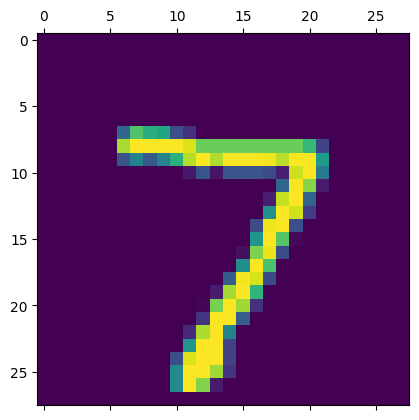

In [22]:
plt.matshow(x_test[0])

In [23]:
y_pred=model.predict(x_test_trattend)
y_pred[0]#here the 10 values are the neurons of output layer

313/313 [==============================] - 4s 10ms/step


array([2.4389934e-02, 3.4248515e-07, 8.0506578e-02, 9.4313675e-01,
       1.8513916e-03, 1.0886983e-01, 1.5026922e-06, 9.9978077e-01,
       6.5962061e-02, 5.3055948e-01], dtype=float32)

In [25]:
np.argmax(y_pred[0])#it will find the max value and print the index of that value

7

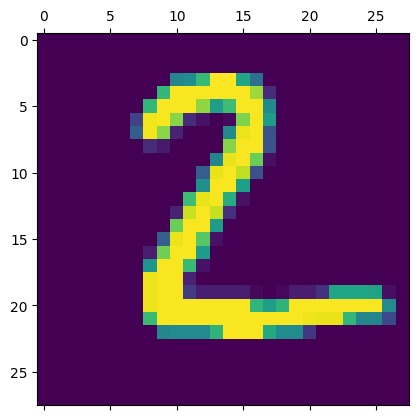

In [26]:
plt.matshow(x_test[1])

In [27]:
np.argmax(y_pred[1])

2

In [28]:
y_pred_labelled=[np.argmax(i) for i in y_pred]
y_pred_labelled


[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 0,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 4,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 5,
 0,
 2,
 4,
 2,


In [30]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labelled)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    3,    1,    0,    4,    5,    3,    1,    0],
       [   0, 1108,    6,    1,    0,    1,    4,    2,   13,    0],
       [   5,    4,  958,   10,    9,    2,   11,   10,   20,    3],
       [   3,    0,   31,  906,    0,   28,    2,   14,   21,    5],
       [   2,    1,    7,    0,  923,    0,    8,    4,    9,   28],
       [  10,    2,    8,   28,    9,  784,   12,    5,   27,    7],
       [  11,    3,   11,    1,    8,   12,  908,    2,    2,    0],
       [   1,    5,   26,    3,    5,    0,    0,  967,    3,   18],
       [   8,    6,   12,   19,    9,   28,    9,   11,  865,    7],
       [  10,    7,    2,   10,   33,    8,    0,   31,    6,  902]])>

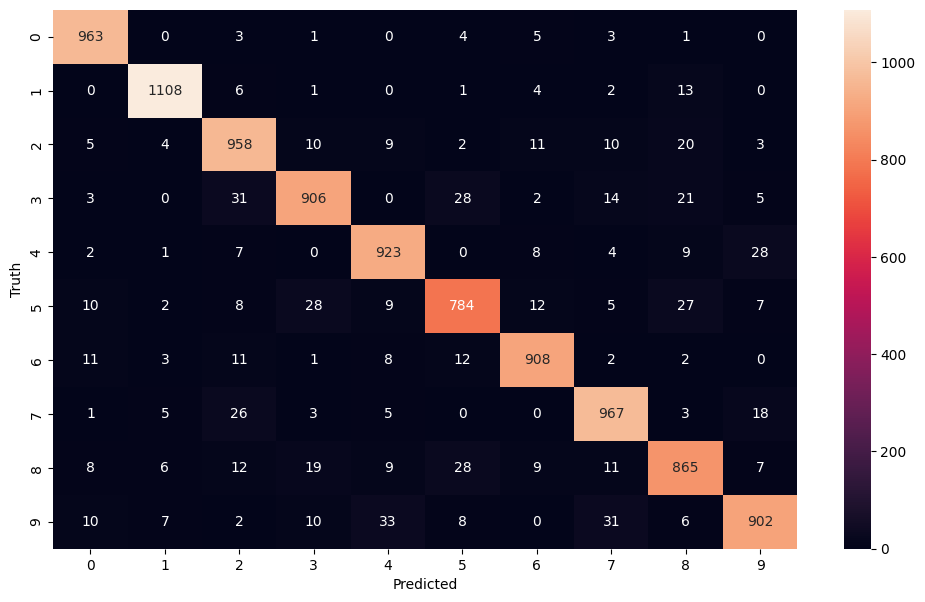

In [32]:
import seaborn as sn
plt.figure(figsize=(12,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [33]:
#here i will add hidden layer which will improve the perfomence
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_trattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 16ms/step - loss: 0.2699 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1213 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0840 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0645 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0505 - accuracy: 0.9848


In [34]:
model.evaluate(x_test_trattend,y_test)

313/313 [==============================] - 8s 14ms/step - loss: 0.0767 - accuracy: 0.9757


[0.07674577087163925, 0.9757000207901001]

313/313 [==============================] - 5s 13ms/step


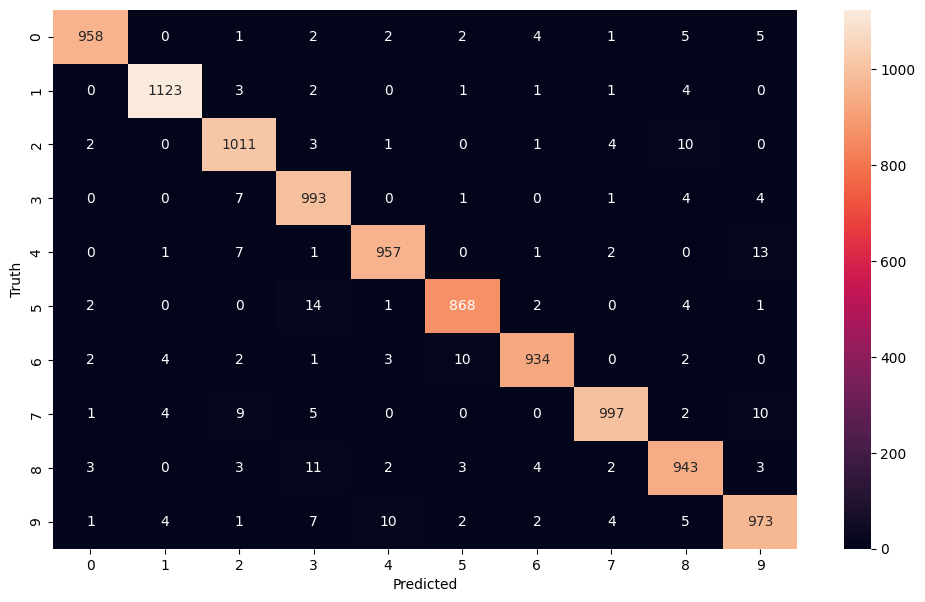

In [35]:
y_pred=model.predict(x_test_trattend)
y_pred_labelled=[np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labelled)

plt.figure(figsize=(12, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [37]:
#if we want not to use x_train_trattend every time then-
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 39s 18ms/step - loss: 0.2690 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1213 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0851 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0649 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0524 - accuracy: 0.9842
